In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as cv
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

Import Data

In [5]:
dataset=pd.read_csv("Data for Cleaning & Modeling.csv")
hold_test=pd.read_csv("Holdout for Testing.csv")

C:\Users\yqm\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.shape

(400000, 32)

In [7]:
dataset.info()

In [6]:
# update variable names
dataset.rename(columns={ 
    'X1':'X1_InterestRate',
    'X2':'X2_LoanID',
    'X3':'X3_BorrowerID',
    'X4':'X4_LoanAmtRequested',
    'X5':'X5_LoanAmtFunded',
    'X6':'X6_InvestorPloan',
    'X7':'X7_NPayment',
    'X8':'X8_LoanGrade',
    'X9':'X9_LoanSubGrade',
    'X10':'X10_Employer_JT',
    'X11':'X11_YearsEmp',
    'X12':'X12_HomeOwn',
    'X13':'X13_Income',
    'X14':'X14_IncomeVerified',
    'X15':'X15_IssueDate',
    'X16':'X16_Reason',
    'X17':'X17_LoanCategory',
    'X18':'X18_LoanTitle',
    'X19':'X19_Zip',
    'X20':'X20_BorrowerState',
    'X21':'X21_Ratio',
    'X22':'X22_NPastDue',
    'X23':'X23_EarliestReportDate',
    'X24':'X24_NInquires',
    'X25':'X25_NMonthD',
    'X26':'X26_NMonthP',
    'X27':'X27_NLines',
    'X28':'X28_NPublic',
    'X29':'X29_TotalCreditBalance',
    'X30':'X30_UtilizedRate',
    'X31':'X31_NCreditLine',
    'X32':'X32_InitialLoanStatus'
}, inplace= True)

In [24]:
dataset.head()

,X1_InterestRate,X2_LoanID,X3_BorrowerID,X4_LoanAmtRequested,X5_LoanAmtFunded,X6_InvestorPloan,X7_NPayment,X8_LoanGrade,X9_LoanSubGrade,Employer_ID,...,X23_EarliestReportDate,X24_NInquires,X25_NMonthD,X26_NMonthP,X27_NLines,X28_NPublic,X29_TotalCreditBalance,X30_UtilizedRate,X31_NCreditLine,X32_InitialLoanStatus
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


# Data Cleaning

Drop Columns with more than 50% Missing Values and less relevant variables

In [7]:
dataset1=dataset[dataset['X1_InterestRate'].notnull()]
dataset1=dataset1[dataset['X4_LoanAmtRequested'].notnull()]

C:\Users\yqm\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [8]:
dataset2=dataset1.drop(['X16_Reason','X25_NMonthD','X26_NMonthP'],axis=1)
dataset3=dataset2.drop(['X2_LoanID','X3_BorrowerID','X9_LoanSubGrade','X10_Employer_JT','X15_IssueDate','X18_LoanTitle','X19_Zip','X20_BorrowerState','X23_EarliestReportDate','X27_NLines'],axis=1)

Data Format

In [9]:
dataset3['X1_InterestRate']=dataset3['X1_InterestRate'].str.replace("[%]","")
dataset3['X1_InterestRate']=pd.to_numeric(dataset3['X1_InterestRate'])
dataset3['X4_LoanAmtRequested']=dataset3['X4_LoanAmtRequested'].str.replace("[$,]","")
dataset3['X4_LoanAmtRequested']=pd.to_numeric(dataset3['X4_LoanAmtRequested'])
dataset3['X5_LoanAmtFunded']=dataset3['X5_LoanAmtFunded'].str.replace("[$,]","")
dataset3['X5_LoanAmtFunded']=pd.to_numeric(dataset3['X5_LoanAmtFunded'])
dataset3['X6_InvestorPloan']=dataset3['X6_InvestorPloan'].str.replace("[$,]","")
dataset3['X6_InvestorPloan']=pd.to_numeric(dataset3['X6_InvestorPloan'])
dataset3['X13_Income']=pd.to_numeric(dataset3['X13_Income'])
dataset3['X30_UtilizedRate']=dataset3['X30_UtilizedRate'].str.replace("[%]","")
dataset3['X30_UtilizedRate']=pd.to_numeric(dataset3['X30_UtilizedRate'])

Deal with Missing Values

In [7]:
dataset3.isnull().sum()

X1_InterestRate               0
X4_LoanAmtRequested           0
X5_LoanAmtFunded              0
X6_InvestorPloan              0
X7_NPayment                   0
X8_LoanGrade              51866
X11_YearsEmp              14794
X12_HomeOwn               51959
X13_Income                51751
X14_IncomeVerified            0
X17_LoanCategory              0
X21_Ratio                     0
X22_NPastDue                  0
X24_NInquires                 0
X28_NPublic                   0
X29_TotalCreditBalance        0
X30_UtilizedRate            224
X31_NCreditLine               0
X32_InitialLoanStatus         0
dtype: int64

In [9]:
# X8
dataset3['X8_LoanGrade'].value_counts()

B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8_LoanGrade, dtype: int64

In [10]:
# poptentially, we can use imputation such as: 
# dataset3['X8_LoanGrade']=dataset3['X8_LoanGrade'].fillna('B')
# however, in this case, record amount of grade B and grade C are quite close and simply imputaion all NAs to Grade B would cause bias.
# and also, the load grade is imporant information and those records without grade also tend to lack information of HomwOwe Type
# thus, I decied to drop all the NAs rows based on Column X8.
dataset3=dataset3.dropna(subset=['X8_LoanGrade'])   

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


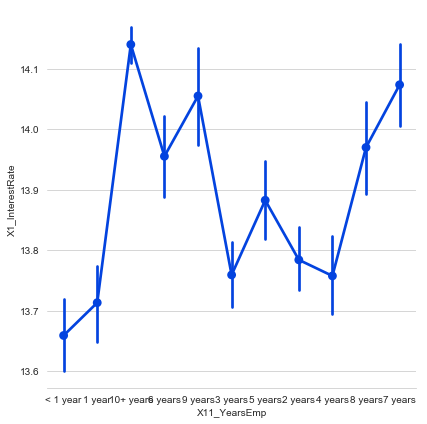

In [9]:
# X11 
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset3, x_vars=['X11_YearsEmp'], y_vars=['X1_InterestRate'],size=6)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

In [ ]:
dataset3['X11_YearsEmp'][dataset3['X11_YearsEmp'].isnull()]='Other'
dataset3['X11_YearsEmp'][dataset3['X11_YearsEmp'].str.contains('< 1 year|1 year|2 years|3 years|4 years|5 years')]='1-5 Years'
dataset3['X11_YearsEmp'][dataset3['X11_YearsEmp'].str.contains('6 years|7 year|8 year|9 year|10+ years')]='6-10 Year'

C:\Users\yqm\Miniconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


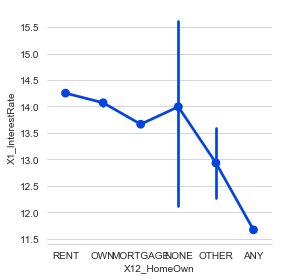

In [10]:
# X12
sns.set_style("whitegrid")
pl=sns.PairGrid(data=dataset3, x_vars=['X12_HomeOwn'], y_vars=['X1_InterestRate'],size=4)
pl.map(sns.pointplot,color=sns.xkcd_rgb["blue"])
sns.despine(left=True)

In [12]:
dataset3['X12_HomeOwn'].value_counts()

MORTGAGE    123495
RENT         98278
OWN          21100
OTHER           93
NONE            28
ANY              1
Name: X12_HomeOwn, dtype: int64

In [12]:
dataset3['X12_HomeOwn']=dataset3['X12_HomeOwn'].fillna('MORTGAGE')
dataset3['X12_HomeOwn'][dataset3['X12_HomeOwn'].str.contains('OTHER|ANY|NONE')]='MORTGAGE'

C:\Users\yqm\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# X13
dataset3['X13_Income']=dataset3['X13_Income'].fillna(dataset3['X13_Income'].mean())

In [14]:
# X30
dataset3['X30_UtilizedRate']=dataset3['X30_UtilizedRate'].fillna(dataset3['X30_UtilizedRate'].mean())

Other Varible Prepping

In [15]:
dataset4=dataset3

In [18]:
# X7
dataset4['X7_NPayment'].value_counts()

 36 months    209979
 60 months     77144
Name: X7_NPayment, dtype: int64

In [19]:
# X14
dataset4['X14_IncomeVerified'].value_counts()

VERIFIED - income           107493
not verified                 91543
VERIFIED - income source     88087
Name: X14_IncomeVerified, dtype: int64

In [16]:
dataset4['Verify']=dataset4['X14_IncomeVerified'].apply(lambda x: 0 if x=='not verified' else 1)

In [17]:
dataset4 = dataset4.drop(['X14_IncomeVerified'],axis=1)

In [102]:
# X17
dataset4['X17_LoanCategory'].value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: X17_LoanCategory, dtype: int64

In [18]:
dataset4['X17_LoanCategory'][dataset4['X17_LoanCategory'].str.contains('renewable_energy|educational|house|vacation|wedding|moving|medical|car|small_business')]='other'

C:\Users\yqm\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
# X32
dataset4['X32_InitialLoanStatus'].value_counts()

f    232600
w    106389
Name: X32_InitialLoanStatus, dtype: int64

In [19]:
dataset4['Female']=dataset4['X32_InitialLoanStatus'].apply(lambda x: 1 if x=='f' else 0)

In [20]:
dataset4 = dataset4.drop(['X32_InitialLoanStatus'],axis=1)

In [21]:
# Ger Dummies
dataset4 = pd.get_dummies(dataset4)

Correlation Check

In [104]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 34 columns):
X1_InterestRate                        287123 non-null float64
X4_LoanAmtRequested                    287123 non-null int64
X5_LoanAmtFunded                       287123 non-null int64
X6_InvestorPloan                       287123 non-null int64
X13_Income                             287123 non-null float64
X21_Ratio                              287123 non-null float64
X22_NPastDue                           287123 non-null float64
X24_NInquires                          287123 non-null float64
X28_NPublic                            287123 non-null float64
X29_TotalCreditBalance                 287123 non-null float64
X30_UtilizedRate                       287123 non-null float64
X31_NCreditLine                        287123 non-null float64
Verify                                 287123 non-null int64
Female                                 287123 non-null int64
X7_NPayment_ 36 m

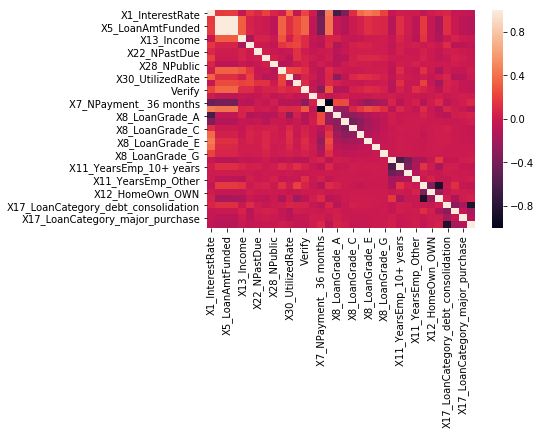

In [26]:
check=dataset4.corr()
sns.heatmap(check)
# overall correlation is fine

Standard

In [22]:
from sklearn.preprocessing import StandardScaler

In [49]:
#dataset3.describe()

,X1_InterestRate,X4_LoanAmtRequested,X5_LoanAmtFunded,X6_InvestorPloan,X13_Income,X21_Ratio,X22_NPastDue,X24_NInquires,X28_NPublic,X29_TotalCreditBalance,X30_UtilizedRate,X31_NCreditLine,Verify
count,338989.000000,338989.000000,338989.000000,338989.000000,3.389890e+05,338989.000000,338989.000000,338989.000000,338989.000000,3.389890e+05,338989.000000,338989.000000,338989.000000
mean,13.946289,14276.968353,14248.306140,14182.000445,7.315146e+04,16.997242,0.274286,0.817911,0.152689,1.597434e+04,56.314158,24.978309,0.681780
std,4.377945,8252.264104,8238.064335,8255.138412,5.172309e+04,7.697223,0.779294,1.059264,0.505363,1.976517e+04,23.746239,11.471413,0.465786
min,5.420000,500.000000,500.000000,0.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,10.990000,8000.000000,8000.000000,8000.000000,4.858100e+04,11.250000,0.000000,0.000000,0.000000,6.462000e+03,39.500000,17.000000,0.000000
50%,13.680000,12000.000000,12000.000000,12000.000000,7.000000e+04,16.700000,0.000000,0.000000,0.000000,1.178200e+04,57.900000,23.000000,1.000000
75%,16.780000,20000.000000,20000.000000,19900.000000,8.200000e+04,22.500000,0.000000,1.000000,0.000000,2.023300e+04,74.900000,32.000000,1.000000
max,26.060000,35000.000000,35000.000000,35000.000000,7.500000e+06,39.990000,29.000000,8.000000,63.000000,2.568995e+06,892.300000,118.000000,1.000000


In [ ]:
s=StandardScaler()
dataset4[['X4_LoanAmtRequested']]=s.fit_transform(dataset4[['X4_LoanAmtRequested']])
dataset4[['X5_LoanAmtFunded']]=s.fit_transform(dataset4[['X5_LoanAmtFunded']])
dataset4[['X6_InvestorPloan']]=s.fit_transform(dataset4[['X6_InvestorPloan']])
dataset4[['X21_Ratio']]=s.fit_transform(dataset4[['X21_Ratio']])
dataset4[['X22_NPastDue']]=s.fit_transform(dataset4[['X22_NPastDue']])
dataset4[['X24_NInquires']]=s.fit_transform(dataset4[['X24_NInquires']])
dataset4[['X28_NPublic']]=s.fit_transform(dataset4[['X28_NPublic']])
dataset4[['X29_TotalCreditBalance']]=s.fit_transform(dataset4[['X29_TotalCreditBalance']])
dataset4[['X30_UtilizedRate']]=s.fit_transform(dataset4[['X30_UtilizedRate']])
dataset4[['X31_NCreditLine']]=s.fit_transform(dataset4[['X31_NCreditLine']])
dataset4[['X28_NPublic']]=s.fit_transform(dataset4[['X28_NPublic']])

dataset4[['X13_Income']]=s.fit_transform(dataset4[['X13_Income']])

# Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
x,y =dataset4.drop(['X1_InterestRate'],axis=1), dataset4['X1_InterestRate']

In [26]:
SEED=0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

Logistics Regression

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train=lr.predict(X_train)
lr_pred_test=lr.predict(X_test)

In [28]:
# Compute the array containing the 10-folds CV MSEs
lr_MSE_CV_scores_train = - cross_val_score(lr, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1) 

# Compute the 10-folds CV RMSE
lr_RMSE_CV_train = (lr_MSE_CV_scores_train.mean())**(1/2)
lr_RMSE_train = MSE(y_train, lr_pred_train)**(1/2)
lr_RMSE_test = MSE(y_test, lr_pred_test)**(1/2)
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(lr_RMSE_CV_train))
print('TrainSet RMSE: {:.2f}'.format(lr_RMSE_train))
print('TestSet RMSE: {:.2f}'.format(lr_RMSE_test))

CV RMSE: 1.21
TrainSet RMSE: 1.21
TestSet RMSE: 1.21


In [29]:
lr_R2_train=lr.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(lr_R2_train))
lr_R2_test=lr.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(lr_R2_test))

R-squared_train: 0.92
R-squared_test: 0.92


Decision Tree

In [30]:
dt = DecisionTreeRegressor(max_depth=15,
                           min_samples_leaf=0.01,
                           random_state=3)
dt.fit(X_train,y_train)
dt_pred_train=dt.predict(X_train)
dt_pred_test=dt.predict(X_test)

In [31]:
dt_MSE_CV_scores_train = - cross_val_score(dt, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1) 
dt_RMSE_CV_train = (dt_MSE_CV_scores_train.mean())**(1/2)
dt_RMSE_train = MSE(y_train, dt_pred_train)**(1/2)
dt_RMSE_test = MSE(y_test, dt_pred_test)**(1/2)
print('CV RMSE: {:.2f}'.format(dt_RMSE_CV_train))
print('TrainSet RMSE: {:.2f}'.format(dt_RMSE_train))
print('TestSet RMSE: {:.2f}'.format(dt_RMSE_test))

CV RMSE: 1.23
TrainSet RMSE: 1.23
TestSet RMSE: 1.22


In [32]:
dt_R2_train=dt.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(dt_R2_train))
dt_R2_test=dt.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(dt_R2_test))

R-squared_train: 0.92
R-squared_test: 0.92


Random Forest

In [53]:
rf = RandomForestRegressor(n_estimators=100,max_depth=15,
random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)
rf_pred_train=rf.predict(X_train)

In [ ]:
rf_MSE_CV_scores_train = - cross_val_score(rf, X_train, y_train, cv=10, 
                                 scoring='neg_mean_squared_error', 
                                 n_jobs=-1) 
rf_RMSE_CV_train = (rf_MSE_CV_scores_train.mean())**(1/2)
rf_RMSE_train = MSE(y_train, rf_pred_train)**(1/2)
rf_RMSE_test = MSE(y_test, rf_pred_test)**(1/2)
print('CV RMSE: {:.2f}'.format(rf_RMSE_CV_train))
print('TrainSet RMSE: {:.2f}'.format(rf_RMSE_train))
print('TestSet RMSE: {:.2f}'.format(rf_RMSE_test))

In [55]:
rf_R2_train=rf.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(rf_R2_train))
rf_R2_test=rf.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(rf_R2_test))
# with depth_max as 20, overfitting. Thus, I asjust the parameter and run it again.

R-squared_train: 0.94
R-squared_test: 0.93


Bagging 

In [56]:
from sklearn.ensemble import BaggingRegressor
# Instantiate a BaggingClassifier 'bc'
bc = BaggingRegressor()
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
bc_y_pred_test = bc.predict(X_test)
bc_y_pred_train = bc.predict(X_train)

In [57]:
bc_R2_train=bc.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(bc_R2_train))
bc_R2_test=bc.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(bc_R2_test))
# overfitting occurs

R-squared_train: 0.99
R-squared_test: 0.92


Gradient Boosting 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=5,
                               n_estimators=100,
                               random_state=1)
# Fit gb to the training set
gb.fit(X_train, y_train)
# Predict test set labels
gb_y_pred_test = gb.predict(X_test)
gb_y_pred_train = gb.predict(X_train)

In [28]:
gb_R2_train=gb.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(gb_R2_train))
gb_R2_test=gb.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(gb_R2_test))

R-squared_train: 0.93
R-squared_test: 0.93


In [42]:
# Tune Search
para ={'n_estimators':[50,100],'min_samples_leaf':[0.01,0.02],'max_depth':[3,4,5]}

In [40]:
from sklearn.model_selection import GridSearchCV
gb_search=GridSearchCV(GradientBoostingRegressor(), para, cv=2)

In [43]:
gb_search.fit(X_train,y_train)
gb_search.best_params_

In [33]:
gb = GradientBoostingRegressor(max_depth=5,min_samples_leaf=0.01,
                               n_estimators=100,
                               random_state=1)
# Fit gb to the training set
gb.fit(X_train, y_train)
# Predict test set labels
gb_y_pred_test = gb.predict(X_test)
gb_y_pred_train = gb.predict(X_train)

In [49]:
gb_MSE_CV_scores_train = - cross_val_score(gb, X_train, y_train, cv=3, 
                               scoring='neg_mean_squared_error', 
                                n_jobs=-1) 
gb_RMSE_CV_train = (gb_MSE_CV_scores_train.mean())**(1/2)
gb_RMSE_train = MSE(y_train, gb_y_pred_train)**(1/2)
gb_RMSE_test = MSE(y_test, gb_y_pred_test)**(1/2)
print('CV RMSE: {:.4f}'.format(gb_RMSE_CV_train))
print('TrainSet RMSE: {:.4f}'.format(gb_RMSE_train))
print('TestSet RMSE: {:.4f}'.format(gb_RMSE_test))

CV RMSE: 1.1977
TrainSet RMSE: 1.1939
TestSet RMSE: 1.1921


In [34]:
gb_R2_train=gb.score(X_train, y_train)
print('R-squared_train: {:.2f}'.format(gb_R2_train))
gb_R2_test=gb.score(X_test, y_test)
print('R-squared_test: {:.2f}'.format(gb_R2_test))

R-squared_train: 0.93
R-squared_test: 0.93


In [ ]:
# Compare all these models, grandient boosting does a better job than other models by achiveing high accuracy and avoide overfitting. I choose it for prediction purpose.

# Prediction

In [28]:
hold_test=pd.read_csv("Holdout for Testing.csv")

In [29]:
hold_test.rename(columns={ 
    'X1':'X1_InterestRate',
    'X2':'X2_LoanID',
    'X3':'X3_BorrowerID',
    'X4':'X4_LoanAmtRequested',
    'X5':'X5_LoanAmtFunded',
    'X6':'X6_InvestorPloan',
    'X7':'X7_NPayment',
    'X8':'X8_LoanGrade',
    'X9':'X9_LoanSubGrade',
    'X10':'X10_Employer_JT',
    'X11':'X11_YearsEmp',
    'X12':'X12_HomeOwn',
    'X13':'X13_Income',
    'X14':'X14_IncomeVerified',
    'X15':'X15_IssueDate',
    'X16':'X16_Reason',
    'X17':'X17_LoanCategory',
    'X18':'X18_LoanTitle',
    'X19':'X19_Zip',
    'X20':'X20_BorrowerState',
    'X21':'X21_Ratio',
    'X22':'X22_NPastDue',
    'X23':'X23_EarliestReportDate',
    'X24':'X24_NInquires',
    'X25':'X25_NMonthD',
    'X26':'X26_NMonthP',
    'X27':'X27_NLines',
    'X28':'X28_NPublic',
    'X29':'X29_TotalCreditBalance',
    'X30':'X30_UtilizedRate',
    'X31':'X31_NCreditLine',
    'X32':'X32_InitialLoanStatus'
}, inplace= True)

In [30]:
hold_test=hold_test.drop(['X1_InterestRate'],axis=1)
hold_test=hold_test.drop(['X16_Reason','X25_NMonthD','X26_NMonthP'],axis=1)
hold_test=hold_test.drop(['X2_LoanID','X3_BorrowerID','X9_LoanSubGrade','X10_Employer_JT','X15_IssueDate','X18_LoanTitle','X19_Zip','X20_BorrowerState','X23_EarliestReportDate','X27_NLines'],axis=1)

In [31]:

hold_test['X4_LoanAmtRequested']=hold_test['X4_LoanAmtRequested'].str.replace("[$,]","")
hold_test['X4_LoanAmtRequested']=pd.to_numeric(hold_test['X4_LoanAmtRequested'])
hold_test['X5_LoanAmtFunded']=hold_test['X5_LoanAmtFunded'].str.replace("[$,]","")
hold_test['X5_LoanAmtFunded']=pd.to_numeric(hold_test['X5_LoanAmtFunded'])
hold_test['X6_InvestorPloan']=hold_test['X6_InvestorPloan'].str.replace("[$,]","")
hold_test['X6_InvestorPloan']=pd.to_numeric(hold_test['X6_InvestorPloan'])
hold_test['X13_Income']=pd.to_numeric(hold_test['X13_Income'])
hold_test['X30_UtilizedRate']=hold_test['X30_UtilizedRate'].str.replace("[%]","")
hold_test['X30_UtilizedRate']=pd.to_numeric(hold_test['X30_UtilizedRate'])

In [32]:
hold_test=hold_test.dropna(subset=['X8_LoanGrade'])   

In [ ]:
hold_test['X11_YearsEmp'][hold_test['X11_YearsEmp'].isnull()]='Other'
hold_test['X11_YearsEmp'][hold_test['X11_YearsEmp'].str.contains('< 1 year|1 year|2 years|3 years|4 years|5 years')]='1-5 Years'
hold_test['X11_YearsEmp'][hold_test['X11_YearsEmp'].str.contains('6 years|7 year|8 year|9 year|10+ years')]='6-10 Year'

In [34]:
#hold_test=hold_test.drop(['X12_HomeOwn'],axis=1)
hold_test['X12_HomeOwn']=hold_test['X12_HomeOwn'].fillna('Other')
hold_test['X12_HomeOwn'][hold_test['X12_HomeOwn'].str.contains('OTHER|ANY|NONE')]='Other'

C:\Users\yqm\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
hold_test['X30_UtilizedRate']=hold_test['X30_UtilizedRate'].fillna(hold_test['X30_UtilizedRate'].mean())

In [36]:
hold_test['Verify']=hold_test['X14_IncomeVerified'].apply(lambda x: 0 if x=='not verified' else 1)
hold_test = hold_test.drop(['X14_IncomeVerified'],axis=1)

In [37]:
hold_test['X17_LoanCategory'][hold_test['X17_LoanCategory'].str.contains('renewable_energy|educational|house|vacation|wedding|moving|medical|car|small_business')]='other'

C:\Users\yqm\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
hold_test['Female']=hold_test['X32_InitialLoanStatus'].apply(lambda x: 1 if x=='f' else 0)

In [39]:
hold_test = hold_test.drop(['X32_InitialLoanStatus'],axis=1)


In [40]:
hold_test = pd.get_dummies(hold_test)

In [ ]:
s=StandardScaler()
hold_test[['X4_LoanAmtRequested']]=s.fit_transform(hold_test[['X4_LoanAmtRequested']])
hold_test[['X5_LoanAmtFunded']]=s.fit_transform(hold_test[['X5_LoanAmtFunded']])
hold_test[['X6_InvestorPloan']]=s.fit_transform(hold_test[['X6_InvestorPloan']])
hold_test[['X21_Ratio']]=s.fit_transform(hold_test[['X21_Ratio']])
hold_test[['X22_NPastDue']]=s.fit_transform(hold_test[['X22_NPastDue']])
hold_test[['X24_NInquires']]=s.fit_transform(hold_test[['X24_NInquires']])
hold_test[['X28_NPublic']]=s.fit_transform(hold_test[['X28_NPublic']])
hold_test[['X29_TotalCreditBalance']]=s.fit_transform(hold_test[['X29_TotalCreditBalance']])
hold_test[['X30_UtilizedRate']]=s.fit_transform(hold_test[['X30_UtilizedRate']])
hold_test[['X31_NCreditLine']]=s.fit_transform(hold_test[['X31_NCreditLine']])
#hold_test['X28_NPublic']]=s.fit_transform(hold_test[['X28_NPublic']])
hold_test[['X13_Income']]=s.fit_transform(hold_test[['X13_Income']])

In [42]:
hold_test.head()

,X4_LoanAmtRequested,X5_LoanAmtFunded,X6_InvestorPloan,X13_Income,X21_Ratio,X22_NPastDue,X24_NInquires,X28_NPublic,X29_TotalCreditBalance,X30_UtilizedRate,...,X11_YearsEmp_10+ years,X11_YearsEmp_6-10 Year,X11_YearsEmp_Other,X12_HomeOwn_MORTGAGE,X12_HomeOwn_OWN,X12_HomeOwn_RENT,X17_LoanCategory_debt_consolidation,X17_LoanCategory_home_improvement,X17_LoanCategory_major_purchase,X17_LoanCategory_other
0,-1.101316,-1.101316,-1.101120,-0.116705,1.066280,-0.371851,0.479242,-0.366451,0.111491,0.368657,...,1,0,0,1,0,0,1,0,0,0
1,1.031554,1.031554,1.032158,0.573733,-0.360828,-0.371851,0.479242,-0.366451,-0.018966,-1.260254,...,0,1,0,0,0,1,1,0,0,0
2,2.334974,2.334974,2.335828,0.175854,1.552055,-0.371851,-0.663171,-0.366451,0.382259,-0.252286,...,1,0,0,1,0,0,1,0,0,0
3,-0.627345,-0.627345,-0.627058,-0.734329,1.606676,-0.371851,0.479242,1.243261,-0.357198,-0.511720,...,1,0,0,0,0,1,1,0,0,0
4,1.031554,1.031554,1.032158,0.118967,1.382382,-0.371851,-0.663171,-0.366451,0.658000,-0.618046,...,1,0,0,1,0,0,1,0,0,0


In [43]:
gb_hold_pred = gb.predict(hold_test)

In [44]:
gb_hold_pred_divideBy100=gb_hold_pred/100

In [45]:
hold_test_copy=pd.read_csv("Holdout for Testing.csv")
result=pd.DataFrame({
    'LoanID': hold_test_copy['X2'],
    'PredictedInterestRate':gb_hold_pred,
    'PredictedInterestConversion':gb_hold_pred_divideBy100
})

In [46]:
result.head()

,LoanID,PredictedInterestRate,PredictedInterestConversion
0,44409194,15.006856,0.150069
1,44017917,7.323703,0.073237
2,44259158,14.294381,0.142944
3,44429213,17.564649,0.175646
4,44299188,11.489138,0.114891


In [47]:
result.to_csv('Loans from WeihuangXie.csv',index=False)

Summary: 
By cmparing all 5 models, grandient boosting does a better job than other models by achiveing high accuracy and avoide overfitting. I choose it for prediction purpose.This model performs well in terms of RMSE and R-square while more works could be done interms of data cleaning and variable selection. It also shows that linear regression models performs relatively poorly than the others because the datapoints are not perfectly linear. 